In [ ]:
from numpy.random import seed
seed(696)


In [ ]:
#imports
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix
import itertools
import keras.utils
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from keras import utils as np_utils

In [ ]:
(x_train_all, y_train_all),(x_test, y_test) = cifar10.load_data()

In [ ]:
x_train_all.shape

(50000, 32, 32, 3)

In [ ]:
#Constants
LABEL_NAMES = ['Plane','Car','Bird','Cat','Deer','Dog','Frog', 'Horse','Ship','Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT= 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

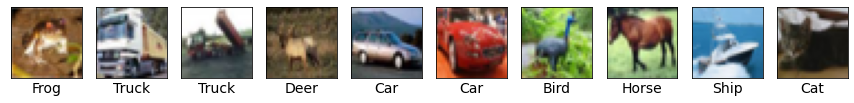

In [ ]:
plt.figure(figsize = (15,5))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.yticks([])
  plt.xticks([])
  plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize = 14)
  plt.imshow(x_train_all[i])

In [ ]:
x_train_all.shape
# 50k entries that are 32 pixles X 32 pixles X 3 RGB

(50000, 32, 32, 3)

In [ ]:
#Preprocess Data #fails with image data augmentation?
# make all values between 0 and 1
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0 
#flatten the matrix
x_train_all2, x_test2 = x_train_all, x_test
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
x_test = x_test.reshape(len(x_test),TOTAL_INPUTS)

ValueError: ignored

In [ ]:
print(x_train_all.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
#create validation data set
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [ ]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
y_train.shape
x_train.shape

(40000, 3072)

In [ ]:
x_train_xs= x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

In [ ]:
#Define the Neural Network 
#type sequential
model_1 = Sequential([
  Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu', name = 'm1_hidden1'),
  Dense(units = 64, activation = 'relu', name = 'm1_hidden2'), 
  Dense(units = 16, activation= 'relu', name = 'm1_hiiden3'), 
  Dense(units = 10, activation = 'softmax', name = 'm1_output')                    
])

model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
model_2 = Sequential()
model_2.add(Dropout(.2, seed = 420, input_shape = (TOTAL_INPUTS,)))
model_2.add(Dense(128, activation = 'relu', name = 'm2_hidden1')),
model_2.add(Dense(64, activation = 'relu', name = 'm2_hidden2')), 
model_2.add(Dense(16, activation= 'relu', name = 'm2_hiiden3')), 
model_2.add(Dense(10, activation = 'softmax', name = 'm2_output'))                    


model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
model_3 = Sequential()
model_3.add(Dropout(.2, seed = 420, input_shape = (TOTAL_INPUTS,)))
model_3.add(Dense(128, activation = 'relu', name = 'm2_hidden1')),
model_3.add(Dropout(.25, seed = 420)),
model_3.add(Dense(64, activation = 'relu', name = 'm2_hidden2')), 
model_3.add(Dense(16, activation= 'relu', name = 'm2_hiiden3')), 
model_3.add(Dense(10, activation = 'softmax', name = 'm2_output'))                    


model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
samples_per_batch = 2000

In [ ]:
# fit the model
%%time 
nr_Epochs = 100

model_1.fit(x_train, y_train, batch_size = samples_per_batch,
            epochs = nr_Epochs, validation_data = (x_val, y_val))


In [ ]:
# fit the model
%%time 
nr_Epochs = 100

model_2.fit(x_train, y_train, batch_size = samples_per_batch,
            epochs = nr_Epochs, validation_data = (x_val, y_val))


Epoch 1/100


ValueError: ignored

In [ ]:
# fit the model
%%time 
nr_Epochs = 100

model_3.fit(x_train, y_train, batch_size = samples_per_batch,
            epochs = nr_Epochs, validation_data = (x_val, y_val))

In [ ]:
#use model to PREDICT
x_val[0].shape
test = np.expand_dims(x_val[0], axis = 0)

In [ ]:
np.set_printoptions(precision = 4)

In [ ]:
model_1.predict(test)

In [ ]:
model_1.predict(x_val)

In [ ]:
 model_1.predict_classes(test)

In [ ]:
AAZZ

In [ ]:
NumberCorrectlyPredicted = 0
TotalTests = 100
for i in range(TotalTests):
  PredictedValue = np.expand_dims(x_val[i], axis = 0)
  print("Actual:", y_val[i])
  print("Predicted:",model_1.predict_classes(PredictedValue))
  if(y_val[i] == model_1.predict_classes(PredictedValue)):
    NumberCorrectlyPredicted += 1
print("Number Correctly Predicted:", NumberCorrectlyPredicted, "/", TotalTests)

Evaluation 

In [ ]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and accuracy is {test_accuracy:0.3}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4705 - accuracy: 0.4824
Test loss is 1.47 and accuracy is 0.482


In [ ]:
# False positives and false negatives  -- CONFUSION matrix
conf_matrix = confusion_matrix(y_test, model_1.predict_classes(x_test))
print(conf_matrix)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[472  30 121  23  55   6  27  43 169  54]
 [ 36 552  30  26  27  12  24  34  96 163]
 [ 53  19 417  74 166  62 110  67  15  17]
 [ 22  18 151 278  89 149 151  75  25  42]
 [ 33   4 177  38 452  27 135 100  22  12]
 [ 16  10 136 188  87 305 106 102  20  30]
 [  5  12 112  75 142  26 572  31  13  12]
 [ 37  15  99  47  93  56  22 568  20  43]
 [ 79  44  40  25  28  16  20  19 671  58]
 [ 40 131  26  40  19  15  32  66  94 537]]


In [ ]:
conf_matrix.max()

In [ ]:
conf_matrix.min()

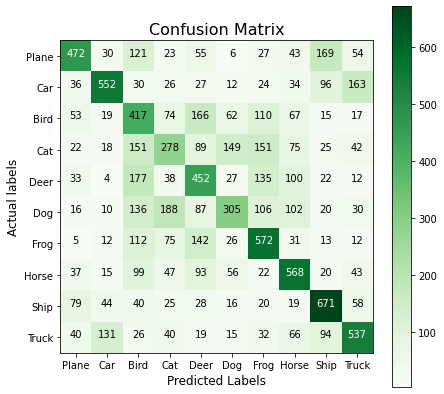

In [ ]:
plt.figure(figsize = (7,7))
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title("Confusion Matrix", fontsize = 16)
plt.ylabel('Actual labels', fontsize = 12)
plt.xlabel('Predicted Labels', fontsize = 12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for rows, columns in itertools.product(range(10), range(10)):
  plt.text(columns, rows, conf_matrix[rows, columns], horizontalalignment = 'center',
           color = 'white' if conf_matrix[rows, columns] > 450 else 'black')


plt.show()
#diagonal shows correct / rows show false negatives - Predicted Y when it was X
# columns shows false positives - predicted X when there was no X

In [ ]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)
recall

array([0.472, 0.552, 0.417, 0.278, 0.452, 0.305, 0.572, 0.568, 0.671,
       0.537])

In [ ]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)
precision

array([0.5952, 0.6611, 0.3186, 0.3415, 0.3903, 0.4525, 0.4771, 0.514 ,
       0.586 , 0.5548])

In [ ]:
avg_recall = np.mean(recall)
print(avg_recall)

0.4824


In [ ]:
avg_precision = np.mean(precision)
avg_precision

0.489109308927753

In [ ]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
f1_score

0.48573148699349084